In [506]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [507]:
data = pd.read_csv('autompg.csv',index_col='car name')

In [508]:
print(data.head())
print(data.index)
print(data.columns)

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index(['chev

In [509]:
data.shape

(398, 8)

In [510]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [511]:
data.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=398)

In [512]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b


In [513]:
data_scale = data.copy()

In [514]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [515]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [516]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,130,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,165,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,150,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,150,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,140,0.520556,0.148810,70,1,USA


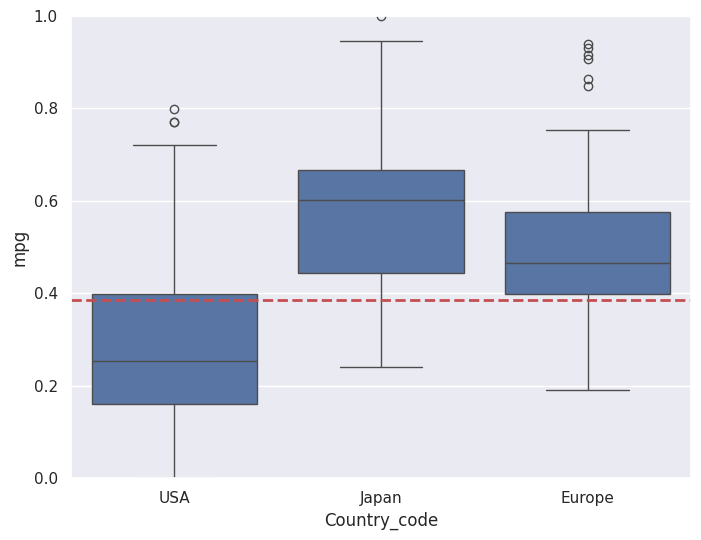

In [517]:
############################################################################################
#                                         MPG BY COUNTRY                                   #
############################################################################################
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)


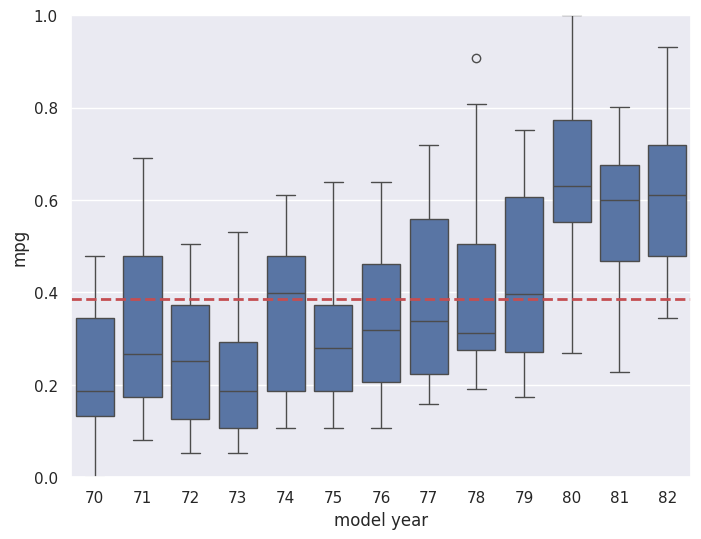

In [518]:
############################################################################################
#                                       MPG BY MODEL YEAR                                  #
############################################################################################
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)


In [519]:
data[data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru', 'subaru dl', 'subaru dl', 'subaru'], dtype='object', name='car name')

In [520]:
data['Company_Name'] = data.index.to_series().str.extract('(^.*?)\s')

In [521]:
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)  ## Strin methords will not work on null values so we use fillna()

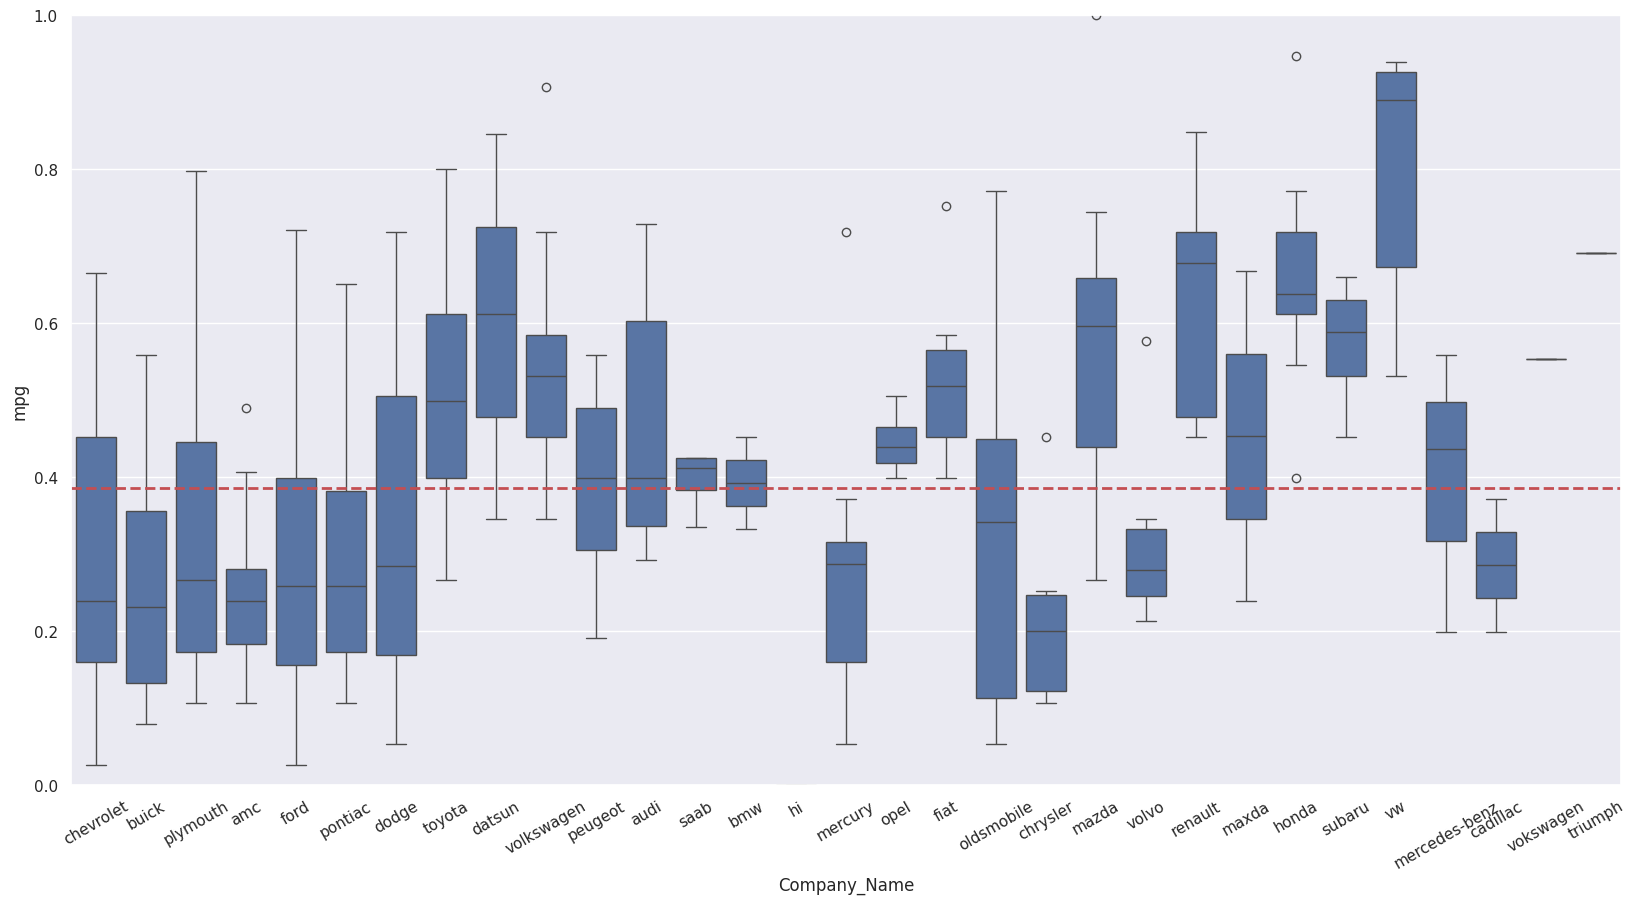

In [522]:
############################################################################################
#                                       MPG BY MANUFACTURER                                #
############################################################################################
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

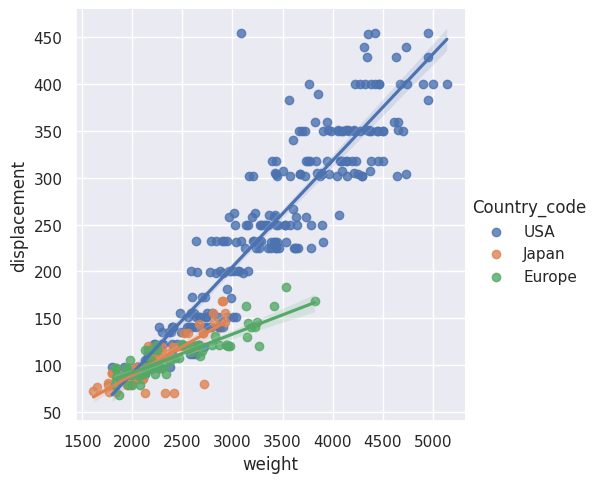

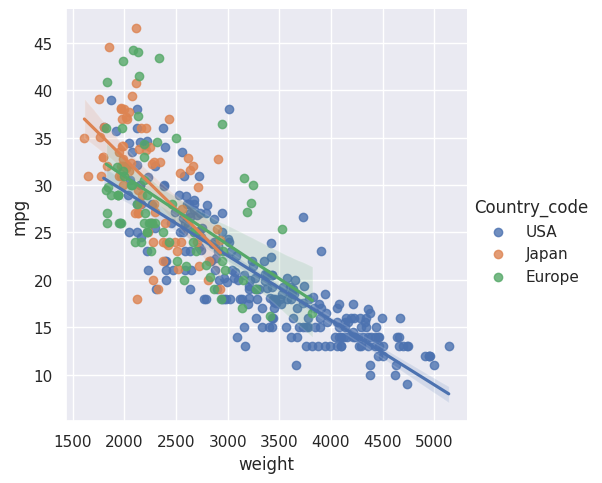

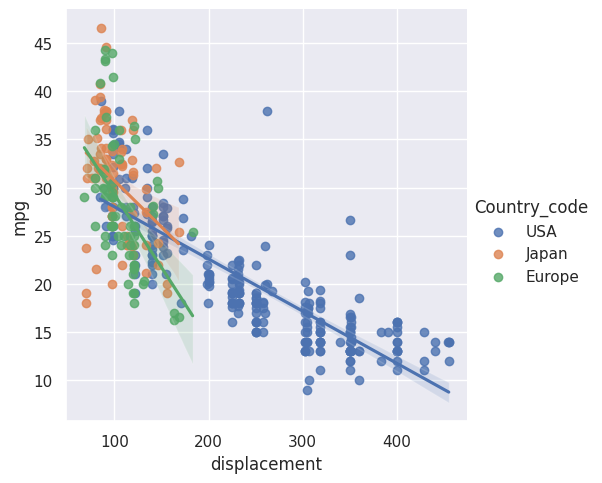

In [523]:
############################################################################################
#                        RELATIONS BETWEEN MPG, WEIGHT, DISPLACEMENT                       #
############################################################################################
var = 'weight'
plot = sns.lmplot(data, x=var,y='displacement',hue='Country_code')

var = 'weight'
plot = sns.lmplot(data, x=var,y='mpg',hue='Country_code')

var = 'displacement'
plot = sns.lmplot(data, x=var,y='mpg',hue='Country_code')